# MNIST Model Building

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))      
import csv
#!pip install tensorflow==2.2-rc3
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator        

In [2]:
train = pd.read_csv('data/sign_mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
def get_data(filename):
    with open(filename) as file:        
        csv_reader = csv.reader(file)  
        next(csv_reader)  # to skip the headers
        
        images = []
        labels = []
        
        for row in csv_reader:
            images.append(np.array(row[1:]).reshape(28, 28))
            labels.append(row[0]) # first value is label

    images = np.array(images).astype(np.float32) 
    labels = np.array(labels).astype(np.float32)
    
    return images, labels

mnist_train = "data/sign_mnist_train.csv"
mnist_test = "data/sign_mnist_test.csv"
training_images, training_labels = get_data(mnist_train)
testing_images, testing_labels = get_data(mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [5]:
training_images = np.expand_dims(training_images,axis=3)
testing_images = np.expand_dims(testing_images,axis=3)

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [6]:
# Define the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1028, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
    
])


In [7]:
# Compile Model. 
model.compile(optimizer = 'adam',
              loss ='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [8]:
train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size=32)
validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size=32)



In [9]:
# Train the Model
history = model.fit_generator(train_generator,
                              #steps_per_epoch = len(training_images)/32,
                              #validation_steps = len(testing_images)/32,
                              epochs = 40,
                              validation_data = validation_generator)

C:\Users\nehak\AppData\Local\Temp\ipykernel_11640\3025703570.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/40
858/858 [==============================] - 28s 32ms/step - loss: 2.7999 - accuracy: 0.1325 - val_loss: 2.1384 - val_accuracy: 0.2651
Epoch 2/40
858/858 [==============================] - 32s 37ms/step - loss: 2.0491 - accuracy: 0.3339 - val_loss: 1.3560 - val_accuracy: 0.5243
Epoch 3/40
858/858 [==============================] - 32s 37ms/step - loss: 1.6031 - accuracy: 0.4690 - val_loss: 1.0290 - val_accuracy: 0.6277
Epoch 4/40
858/858 [==============================] - 33s 39ms/step - loss: 1.3629 - accuracy: 0.5411 - val_loss: 0.7636 - val_accuracy: 0.7349
Epoch 5/40
858/858 [==============================] - 34s 40ms/step - loss: 1.1733 - accuracy: 0.6075 - val_loss: 0.6968 - val_accuracy: 0.7337
Epoch 6/40
858/858 [==============================] - 33s 38ms/step - loss: 1.0383 - accuracy: 0.6508 - val_loss: 0.6935 - val_accuracy: 0.7553
Epoch 7/40
858/858 [==============================] - 38s 44ms/step - loss: 0.9288 - accuracy: 0.6850 - val_loss: 0.5244 - val_accuracy:

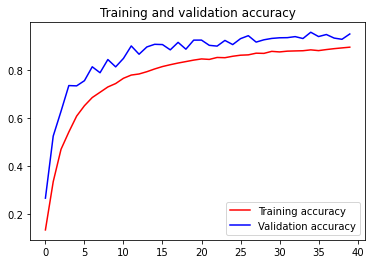

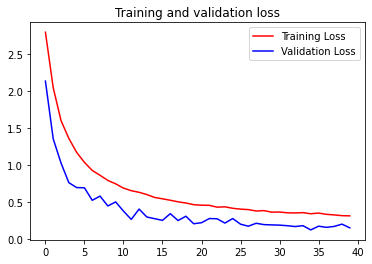

In [10]:
# Plot the chart for accuracy and loss on both training and validation


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
model.save("model.h5")